In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For pretty plots
sns.set(style="whitegrid")
%matplotlib inline
df = pd.read_csv('netflix_titles.csv')

# Check the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
 12  year_added    6223 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 633.3+ KB


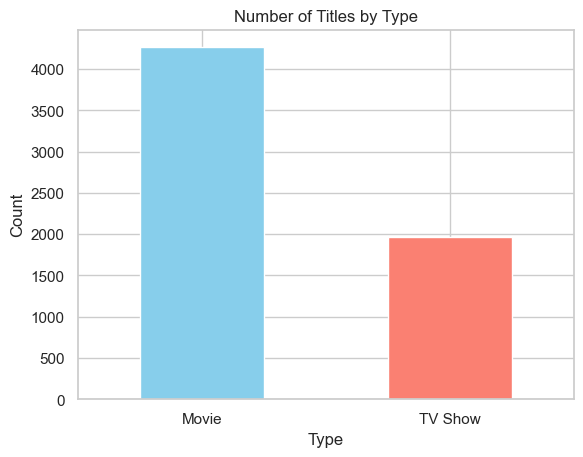

In [79]:
type_counts = df['type'].value_counts()

type_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Titles by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


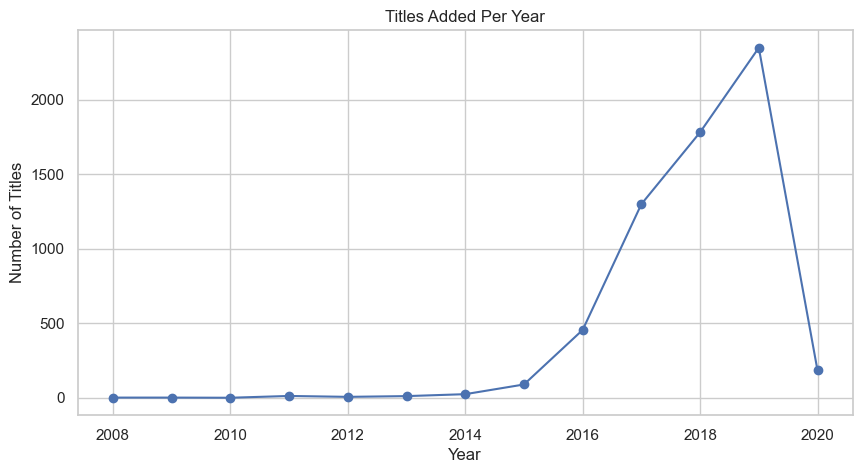

In [47]:
# Step 1: Strip leading/trailing spaces from the 'date_added' column
df['date_added'] = df['date_added'].astype(str).str.strip()

# Step 2: Convert to datetime, ignoring errors (for invalid formats or missing values)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 3: Extract year
df['year_added'] = df['date_added'].dt.year
yearly_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
yearly_counts.plot(kind='line', marker='o')
plt.title('Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


<Axes: ylabel='country'>

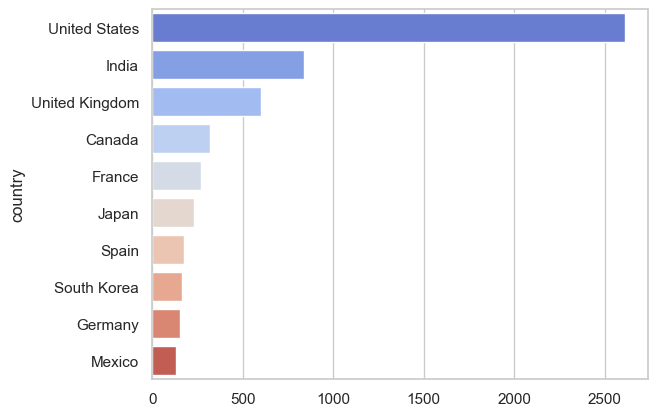

In [49]:
sns.barplot(
    x=country_counts.values,
    y=country_counts.index,
    hue=country_counts.index,  # adds color per country
    dodge=False,
    legend=False,
    palette='coolwarm'
)


In [81]:
multi_genre_shows = df[df['listed_in'].str.contains(',')]
print(multi_genre_shows[['title', 'listed_in']])


                                            title  \
0         Norm of the North: King Sized Adventure   
5                                         Apaches   
6                                        Automata   
8                                    Fire Chasers   
9                                     Good People   
...                                           ...   
6226                          La Familia P. Luche   
6227                 The Adventures of Figaro Pho   
6229                                 Red vs. Blue   
6232  A Young Doctor's Notebook and Other Stories   
6233                                      Friends   

                                              listed_in  
0                    Children & Family Movies, Comedies  
5     Crime TV Shows, International TV Shows, Spanis...  
6     International Movies, Sci-Fi & Fantasy, Thrillers  
8                       Docuseries, Science & Nature TV  
9                         Action & Adventure, Thrillers  
...            

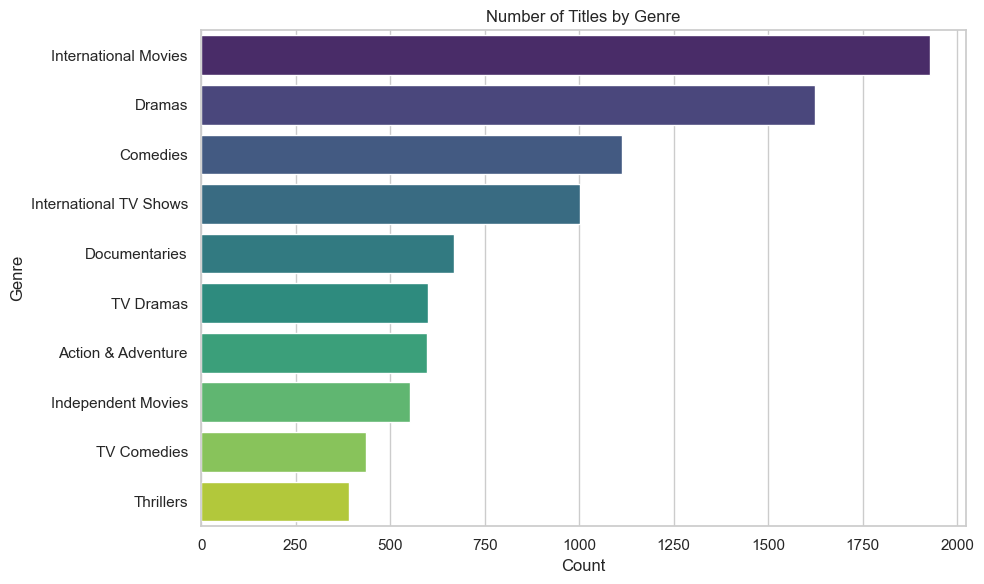

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
    hue=genre_counts.index,         # assign hue to enable palette
    dodge=False,
    legend=False,
    palette='viridis'               # no need for color_palette() now
)
plt.title('Number of Titles by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In [60]:
df['year_added'] = df['date_added'].dt.year
print(df['year_added'].value_counts().sort_index())


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       7
2013.0      12
2014.0      25
2015.0      90
2016.0     456
2017.0    1300
2018.0    1782
2019.0    2349
2020.0     184
Name: count, dtype: int64


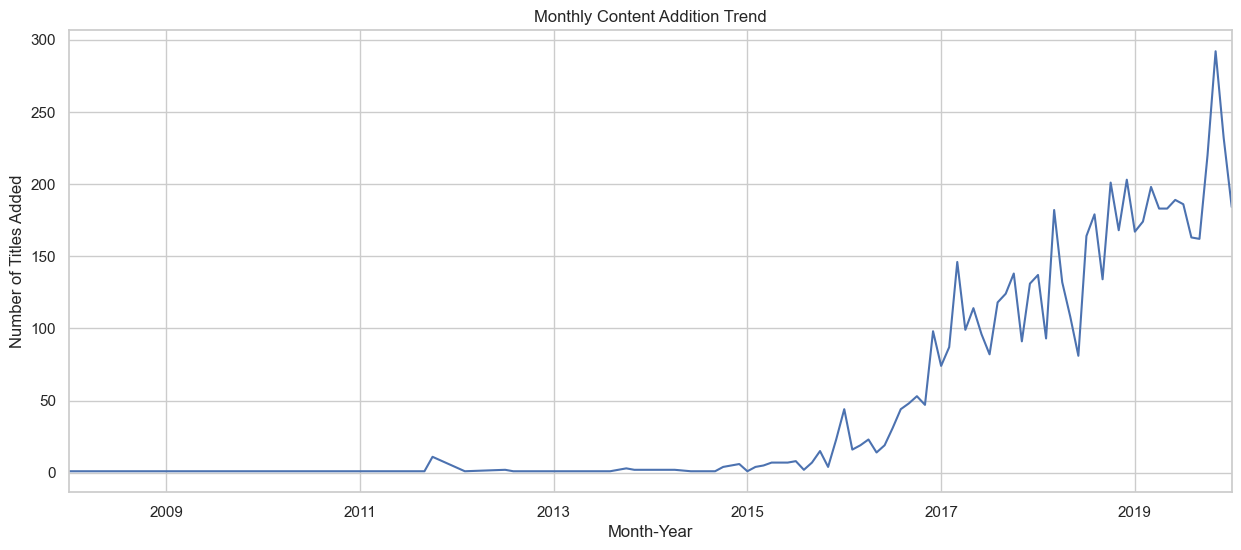

In [58]:
df['month_year'] = df['date_added'].dt.to_period('M')
monthly_trend = df['month_year'].value_counts().sort_index()

monthly_trend.plot(figsize=(15,6))
plt.title('Monthly Content Addition Trend')
plt.xlabel('Month-Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [63]:
if 'Vote_Average' in df.columns:
    catigorize_col(df, 'Vote_Average', labels)
else:
    print("Column 'Vote_Average' not found!")


Column 'Vote_Average' not found!


array([[<Axes: title={'center': 'show_id'}>,
        <Axes: title={'center': 'date_added'}>],
       [<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'year_added'}>]], dtype=object)

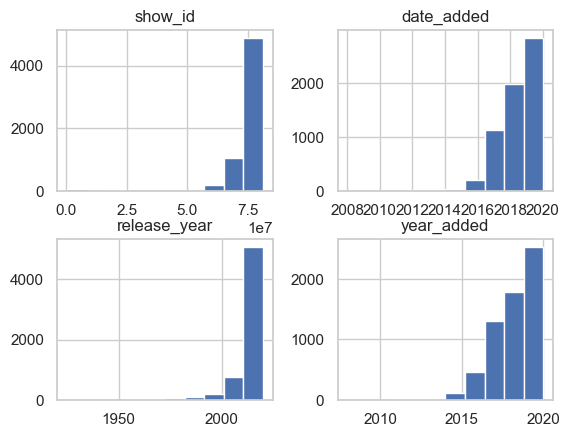

In [66]:
df.hist()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
 12  year_added    6223 non-null   float64       
 13  month_year    6223 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(9), period[M](1)
memory usage: 682.0+

In [71]:
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1189
release_year      72
rating            14
duration         201
listed_in        461
description     6226
year_added        13
month_year        92
dtype: int64

In [72]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_year'],
      dtype='object')


In [74]:
# Convert 'rating' column to numeric, forcing errors to NaN (if any invalid values exist)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Create a new 'popularity' column based on the 'rating' column
df['popularity'] = df['rating'].apply(lambda x: 'High' if x >= 8 else ('Medium' if x >= 5 else 'Low'))

# Now, you can filter or perform operations based on the new 'popularity' column
print(df[df['popularity'] == 'High'])  # For example, showing all shows with high popularity


Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, year_added, month_year, popularity]
Index: []


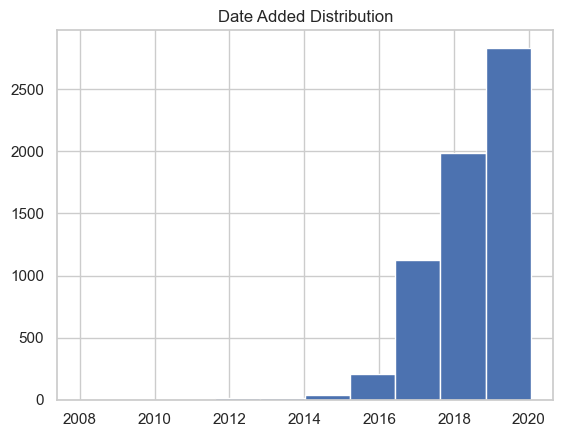

In [77]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Convert to datetime, handle errors if any
df['date_added'].hist()
plt.title('Date Added Distribution')
plt.show()